# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
compcities = []
lat = []
lng = []
tempmax = []
humidity = []
clouds = []
winds = []
countries = []
dates = []
count = 1

# Loop through the list of cities and perform a request for data on each
print('Data Retrieval In Process')
print('------------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        tempmax.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        compcities.append(city)
        print(f"Retrieving City #{count}: {city}.")
        count = count + 1
    except:
        print(f"City {city} not found. Skipping.")
        pass
print('------------------------------')
print('Data Retrieved')
print('------------------------------')

Data Retrieval In Process
------------------------------
Retrieving City #1: berberati.
Retrieving City #2: rikitea.
Retrieving City #3: mednogorsk.
Retrieving City #4: colwyn bay.
Retrieving City #5: lorengau.
Retrieving City #6: itaituba.
Retrieving City #7: mountain home.
Retrieving City #8: mar del plata.
Retrieving City #9: makakilo city.
Retrieving City #10: lumeje.
Retrieving City #11: salalah.
Retrieving City #12: ushuaia.
Retrieving City #13: richmond.
Retrieving City #14: cape town.
Retrieving City #15: kapaa.
Retrieving City #16: beyneu.
Retrieving City #17: avarua.
Retrieving City #18: itarema.
City kamenskoye not found. Skipping.
Retrieving City #19: bethel.
Retrieving City #20: polyarnyy.
Retrieving City #21: saldanha.
Retrieving City #22: auray.
Retrieving City #23: atuona.
Retrieving City #24: butterworth.
Retrieving City #25: dwarka.
Retrieving City #26: tarakan.
Retrieving City #27: shurob.
Retrieving City #28: ous.
Retrieving City #29: codrington.
Retrieving City #30

Retrieving City #232: guerrero negro.
Retrieving City #233: kogon.
Retrieving City #234: mahebourg.
Retrieving City #235: norman wells.
Retrieving City #236: pitanga.
Retrieving City #237: vila franca do campo.
Retrieving City #238: khilok.
Retrieving City #239: dano.
Retrieving City #240: abu dhabi.
Retrieving City #241: praya.
Retrieving City #242: nabire.
Retrieving City #243: hasaki.
Retrieving City #244: mount isa.
City bacuit not found. Skipping.
Retrieving City #245: sao joaquim.
Retrieving City #246: hilo.
City angra not found. Skipping.
Retrieving City #247: egvekinot.
Retrieving City #248: eureka.
Retrieving City #249: ishigaki.
Retrieving City #250: zyryanka.
Retrieving City #251: luderitz.
Retrieving City #252: rojhan.
Retrieving City #253: san patricio.
Retrieving City #254: bambous virieux.
Retrieving City #255: coquimbo.
Retrieving City #256: adrian.
Retrieving City #257: mincivan.
Retrieving City #258: quesnel.
Retrieving City #259: tahoua.
Retrieving City #260: orotuka

Retrieving City #466: hami.
Retrieving City #467: ust-kuyga.
Retrieving City #468: beringovskiy.
Retrieving City #469: leninskoye.
Retrieving City #470: astorga.
Retrieving City #471: conselheiro pena.
Retrieving City #472: pangkalanbuun.
Retrieving City #473: simao.
Retrieving City #474: hofn.
Retrieving City #475: tucuman.
Retrieving City #476: deputatskiy.
Retrieving City #477: noumea.
Retrieving City #478: okhotsk.
Retrieving City #479: springdale.
City mrirt not found. Skipping.
Retrieving City #480: ust-nera.
Retrieving City #481: khanpur.
Retrieving City #482: sibolga.
Retrieving City #483: mastung.
Retrieving City #484: khani.
Retrieving City #485: ketchikan.
Retrieving City #486: atasu.
Retrieving City #487: magadan.
Retrieving City #488: coruripe.
Retrieving City #489: xining.
Retrieving City #490: puerto cabello.
Retrieving City #491: jizan.
Retrieving City #492: kerema.
Retrieving City #493: bangolo.
Retrieving City #494: grand-santi.
Retrieving City #495: ossora.
Retrievin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({'City':compcities,"Lat":lat,
                         "Lng":lng,"Max Temp":tempmax,
                         "Humidity":humidity,"Cloudiness":clouds,
                         "Wind Speed":winds,"Country":countries,
                         "Date":dates})
weather_df.to_csv('citydata.csv',index=False)
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berberati,4.2612,15.7922,67.71,95,100,4.74,CF,1619650882
1,rikitea,-23.1203,-134.9692,76.21,67,43,10.49,PF,1619650882
2,mednogorsk,51.4128,57.5950,43.21,82,75,1.19,RU,1619650882
3,colwyn bay,53.2948,-3.7267,46.40,71,98,9.22,GB,1619650883
4,lorengau,-2.0226,147.2712,83.62,74,27,5.55,PG,1619650759


In [5]:
weather_summary_df = weather_df.describe()
weather_summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.441200,17.310789,61.317938,71.120438,54.344891,7.235292,1.619651e+09
std,33.126397,89.850412,18.661110,22.500784,38.574693,4.732105,1.047337e+02
min,-54.800000,-179.166700,5.200000,9.000000,0.000000,0.670000,1.619651e+09
25%,-6.122500,-62.143950,48.020000,61.000000,15.750000,3.957500,1.619651e+09
50%,25.620650,26.781850,64.850000,77.000000,66.500000,6.430000,1.619651e+09
75%,48.833375,91.678125,77.000000,88.000000,91.000000,9.220000,1.619651e+09
max,78.218600,179.316700,93.200000,100.000000,100.000000,31.070000,1.619651e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Check if there are cities with humidity of more than 100%
print("Analyzing data for humidity values over 100%")
print('-----------------------------------------')
humidvals = weather_df['Humidity'].to_list()
humidcount = 0
for value in humidvals:
    if value > 100:
        humidcount == humidcount + 1
if humidcount == 0:
    print("There are no cities with more than 100% humidity, sorry!")
    print('-----------------------------------------')
    print("Analysis done")
    print('-----------------------------------------')
else:
    print(f"There are {humidcount} cities with more than 100% humidity")
    print('-----------------------------------------')
    print("Analysis done")
    print('-----------------------------------------')

Analyzing data for humidity values over 100%
-----------------------------------------
There are no cities with more than 100% humidity, sorry!
-----------------------------------------
Analysis done
-----------------------------------------


In [7]:
#  Get the indices of cities that have humidity over 100%.
if humidcount == 0:
    print("Again, there are no cities with more than 100% humidity, sorry!")
else:
    humid_weather_df = weather_df[weather_df['Track Name'] > 100]
    humidindexes = list(humid_weather_df.index.values)
    humidindexes

Again, there are no cities with more than 100% humidity, sorry!


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
if humidcount == 0:
    print("Again, there are no cities with more than 100% humidity, sorry!")
    clean_city_data = weather_df
else:
    clean_city_data = weather_df.drop(humidindexes)
clean_city_data.head()

Again, there are no cities with more than 100% humidity, sorry!


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berberati,4.2612,15.7922,67.71,95,100,4.74,CF,1619650882
1,rikitea,-23.1203,-134.9692,76.21,67,43,10.49,PF,1619650882
2,mednogorsk,51.4128,57.5950,43.21,82,75,1.19,RU,1619650882
3,colwyn bay,53.2948,-3.7267,46.40,71,98,9.22,GB,1619650883
4,lorengau,-2.0226,147.2712,83.62,74,27,5.55,PG,1619650759


In [9]:
# Obtain dates in correct format
clean_city_data = clean_city_data.rename(columns={"Date":"Epoch Time"})
tstamps = clean_city_data['Epoch Time'].to_list()
for tstamp in tstamps:
    clean_city_data['Timestamp'] = pd.to_datetime(tstamp, unit='s')
    clean_city_data['Date'] = pd.to_datetime(clean_city_data['Timestamp']).dt.date
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Epoch Time,Timestamp,Date
0,berberati,4.2612,15.7922,67.71,95,100,4.74,CF,1619650882,2021-04-28 23:04:32,2021-04-28
1,rikitea,-23.1203,-134.9692,76.21,67,43,10.49,PF,1619650882,2021-04-28 23:04:32,2021-04-28
2,mednogorsk,51.4128,57.5950,43.21,82,75,1.19,RU,1619650882,2021-04-28 23:04:32,2021-04-28
3,colwyn bay,53.2948,-3.7267,46.40,71,98,9.22,GB,1619650883,2021-04-28 23:04:32,2021-04-28
4,lorengau,-2.0226,147.2712,83.62,74,27,5.55,PG,1619650759,2021-04-28 23:04:32,2021-04-28
...,...,...,...,...,...,...,...,...,...,...,...
543,unicov,49.7709,17.1214,45.00,83,83,2.84,CZ,1619651070,2021-04-28 23:04:32,2021-04-28
544,mount pleasant,32.7941,-79.8626,75.20,69,1,13.80,US,1619651071,2021-04-28 23:04:32,2021-04-28
545,juneau,58.3019,-134.4197,46.00,65,90,11.50,US,1619650942,2021-04-28 23:04:32,2021-04-28
546,stornoway,58.2093,-6.3865,39.20,87,97,6.91,GB,1619651072,2021-04-28 23:04:32,2021-04-28


In [10]:
# Save date value
retrievedate = str(clean_city_data['Date'][0])

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

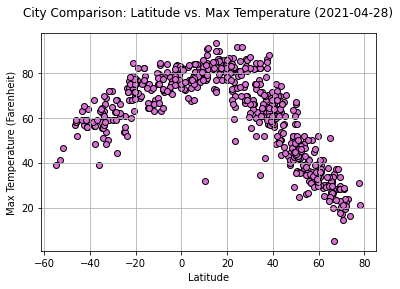

In [11]:
lattempscatter = clean_city_data[['City','Lat','Max Temp']]
plt.scatter(lattempscatter['Lat'],lattempscatter['Max Temp'],c='orchid',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'City Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('all_latvstemp.png')
plt.show()

## Latitude vs. Humidity Plot

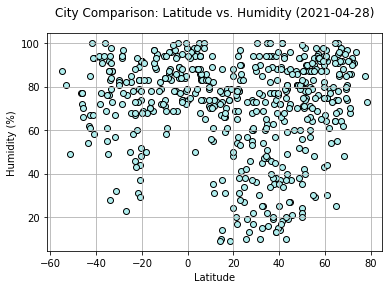

In [12]:
humtempscatter = clean_city_data[['City','Lat','Humidity']]
plt.scatter(humtempscatter['Lat'],humtempscatter['Humidity'],
            c='paleturquoise',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'City Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('all_latvshum.png')
plt.show()

## Latitude vs. Cloudiness Plot

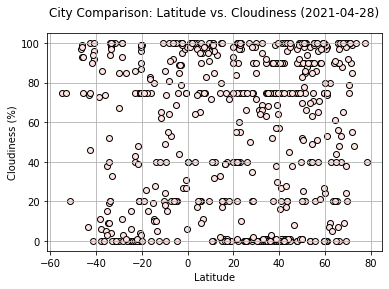

In [13]:
clotempscatter = clean_city_data[['City','Lat','Cloudiness']]
plt.scatter(clotempscatter['Lat'],clotempscatter['Cloudiness'],
            c='mistyrose',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'City Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('all_latvscloud.png')
plt.show()

## Latitude vs. Wind Speed Plot

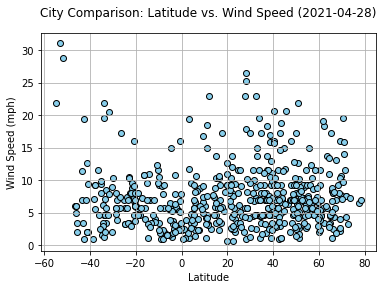

In [14]:
wsptempscatter = clean_city_data[['City','Lat','Wind Speed']]
plt.scatter(wsptempscatter['Lat'],wsptempscatter['Wind Speed'],
            c='skyblue',edgecolors='black')
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'City Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('all_latvswind.png')
plt.show()

## Linear Regression

In [15]:
# Get northern hemisphere dataframe
north_df = clean_city_data[clean_city_data['Lat'] >= 0]
# Get southern hemisphere dataframe
south_df = clean_city_data[clean_city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

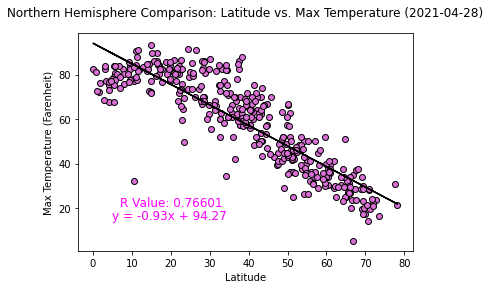

R Value: 0.76601


In [16]:
x_values = north_df['Lat']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='orchid',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(5,15),fontsize=12,color="magenta")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(7,21),fontsize=12,color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('north_latvstemp.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

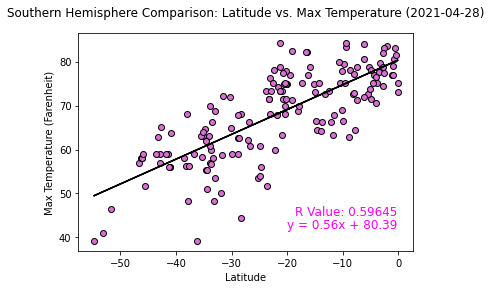

R Value: 0.59645


In [17]:
x_values = south_df['Lat']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='orchid',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-20,42),fontsize=12,color="magenta")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-18.5,45),fontsize=12,color="magenta")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Farenheit)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Max Temperature ({retrievedate})', y=1.05)
plt.savefig('south_latvstemp.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

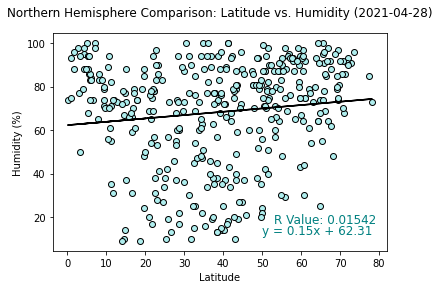

R Value: 0.01542


In [18]:
x_values = north_df['Lat']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='paleturquoise',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(50,12),fontsize=12,color="teal")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(53,17),fontsize=12,color="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('north_latvshum.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

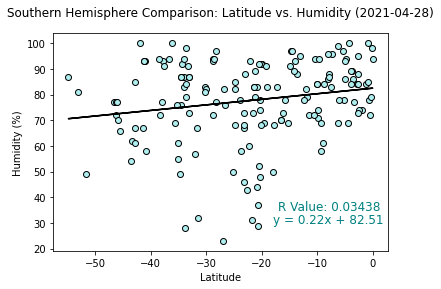

R Value: 0.03438


In [19]:
x_values = south_df['Lat']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='paleturquoise',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-18,30),fontsize=12,color="teal")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-17,35),fontsize=12,color="teal")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Humidity ({retrievedate})', y=1.05)
plt.savefig('south_latvshum.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

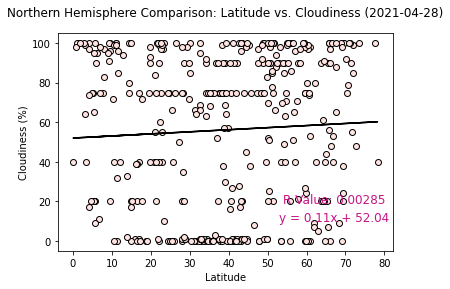

R Value: 0.00285


In [20]:
x_values = north_df['Lat']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='mistyrose',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(53,10),fontsize=12,color="mediumvioletred")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(54,19),fontsize=12,color="mediumvioletred")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('north_latvscloud.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

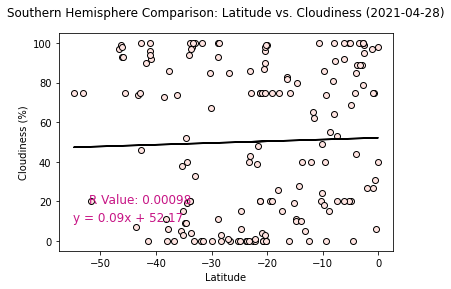

R Value: 0.00098


In [21]:
x_values = south_df['Lat']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='mistyrose',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-55,10),fontsize=12,color="mediumvioletred")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-52,19),fontsize=12,color="mediumvioletred")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Cloudiness ({retrievedate})', y=1.05)
plt.savefig('south_latvscloud.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

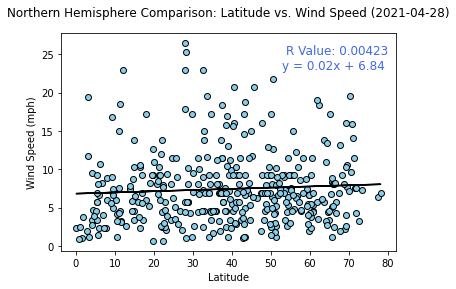

R Value: 0.00423


In [22]:
x_values = north_df['Lat']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='skyblue',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(53,23),fontsize=12,color="royalblue")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(54,25),fontsize=12,color="royalblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Northern Hemisphere Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('north_latvswind.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

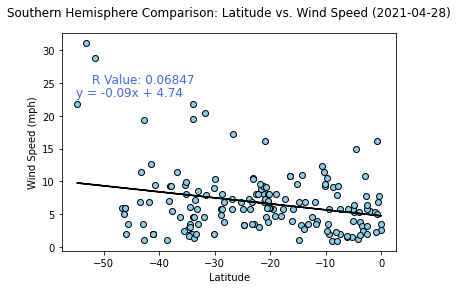

R Value: 0.06847


In [23]:
x_values = south_df['Lat']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c='skyblue',edgecolors='black')
plt.plot(x_values,regress_values,"black")
plt.annotate(line_eq,(-55,23),fontsize=12,color="royalblue")
plt.annotate(f'R Value: {(rvalue**2).round(5)}',(-52,25),fontsize=12,color="royalblue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f'Southern Hemisphere Comparison: Latitude vs. Wind Speed ({retrievedate})', y=1.05)
plt.savefig('south_latvswind.png')
plt.show()
print(f'R Value: {(rvalue**2).round(5)}')